In [423]:
import pandas as pd
import numpy as np

from faker import Faker
import datetime

import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
%matplotlib inline

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
print(__version__)
import plotly.express as px

import cufflinks as cf
import chart_studio
chart_studio.tools.set_credentials_file(username='orjames1158', api_key='N58X7Avu8GUq7wT5oetT')

4.14.3


In [375]:
# instantiate a faker model
faker = Faker()

# Creating Fake Daily Revenue Data
* https://www.kite.com/python/answers/how-to-create-a-range-of-dates-in-python#
* https://docs.python.org/3/library/datetime.html
* https://stackoverflow.com/questions/993358/creating-a-range-of-dates-in-python
* https://zetcode.com/python/faker/
* https://faker.readthedocs.io/en/master/
* https://faker.readthedocs.io/en/master/providers.html


In [376]:
revenue_df = pd.DataFrame(columns = ['date', 'revenue', 'covers'])

In [377]:
revenue_list = []
for i in range(90):
    revenue_list.append(faker.random_int(10000,25000))
for i in range(90,180):
    revenue_list.append(faker.random_int(7000,20000))
for i in range(180, 270):
    revenue_list.append(faker.random_int(12000, 22000))
for i in range(270, 360):
    revenue_list.append(faker.random_int(15000, 30000)) 
for i in range(360, 455):
    revenue_list.append(faker.random_int(10000,25000))
for i in range(455,545):
    revenue_list.append(faker.random_int(7000,20000))
for i in range(545, 635):
    revenue_list.append(faker.random_int(12000, 22000))
for i in range(635, 725):
    revenue_list.append(faker.random_int(15000, 30000)) 
for i in range(725, 815):
    revenue_list.append(faker.random_int(10000,25000))
for i in range(815,905):
    revenue_list.append(faker.random_int(7000,20000))
for i in range(905, 995):
    revenue_list.append(faker.random_int(12000, 22000))
for i in range(995, 1095):
    revenue_list.append(faker.random_int(15000, 30000))    

    
covers_list = []
for i in range(90):
    covers_list.append(faker.random_int(50,25000))
for i in range(90,180):
    covers_list.append(faker.random_int(20, 175))
for i in range(180, 270):
    covers_list.append(faker.random_int(35, 250))
for i in range(270, 360):
    covers_list.append(faker.random_int(70, 315)) 
for i in range(360, 455):
    covers_list.append(faker.random_int(50,25000))
for i in range(455,545):
    covers_list.append(faker.random_int(20, 175))
for i in range(545, 635):
    covers_list.append(faker.random_int(35, 250))
for i in range(635, 725):
    covers_list.append(faker.random_int(70, 315))  
for i in range(725, 815):
    covers_list.append(faker.random_int(50,25000))
for i in range(815,905):
    covers_list.append(faker.random_int(20, 175))
for i in range(905, 995):
    covers_list.append(faker.random_int(35, 250))
for i in range(995, 1095):
    covers_list.append(faker.random_int(70, 317))         

In [378]:
len(revenue_list)
len(covers_list)

1095

In [379]:
revenue_df['revenue'] = revenue_list
revenue_df['covers'] = covers_list
revenue_df['covers'] = round(revenue_df['revenue'] * .013, 0)
revenue_df['per_cover_average'] = round(revenue_df['revenue'] / revenue_df['covers'], 2)

In [380]:
start_date = datetime.date(2018, 3 , 15)
number_of_days = 1095

date_list = [(start_date + datetime.timedelta(days = day)).isoformat() for day in range(number_of_days)]

#previewing the date_list
print(date_list[5])

2018-03-20


In [381]:
revenue_df['date'] = date_list

In [382]:
# revenue_df.set_index('date', inplace = True)

# Plotly Plots
https://plotly.com/python/getting-started-with-chart-studio/
https://plotly.com/python/line-and-scatter/
https://plotly.com/python/interactive-html-export/
https://plotly.com/javascript/static-image-export/


In [446]:
x=revenue_df['date']
y=revenue_df['revenue']
# color_discrete_map = {'y':'#8A1B20'}
fig = px.line(data_frame = revenue_df, x=x, y=y, title='Daily Revenue 2018 to Present')
fig2 = px.line(data_frame = revenue_df, x=x, y=revenue_df['covers'])
fig.update_traces(line_color='#8A1B20')


fig.show()
fig2.show()
fig.write_html('../assets/plotly_line.html')

In [412]:
revenue_df.iplot(kind='scatter', x='date', y='revenue', mode = 'markers', size = 10, colors = {'revenue':'#8A1B20'})

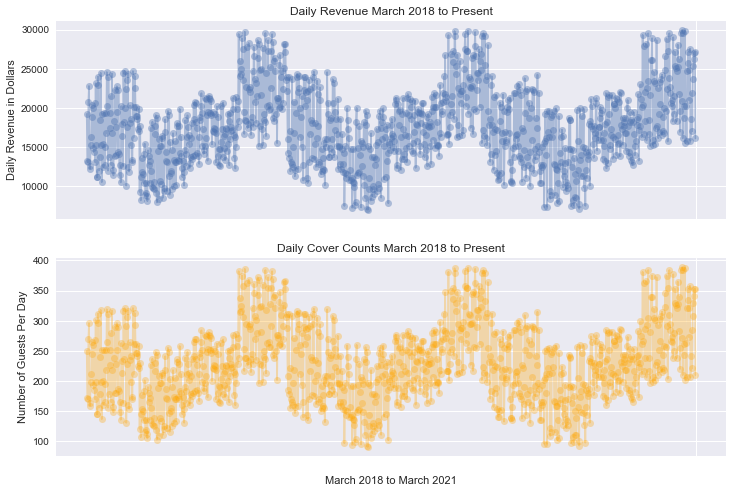

In [434]:
plt.figure(figsize = (12,8))
plt.subplot(211)
plt.plot(revenue_df['date'], revenue_df['revenue'], marker = 'o', alpha = .4)
plt.title('Daily Revenue March 2018 to Present')
plt.xticks(' ')
plt.ylabel('Daily Revenue in Dollars')

plt.subplot(212)
plt.plot(revenue_df['date'], revenue_df['covers'], marker = 'o', color = 'orange', alpha = .3)
plt.title('Daily Cover Counts March 2018 to Present')
plt.xticks(' ')
plt.xlabel('March 2018 to March 2021')
plt.ylabel('Number of Guests Per Day')

plt.show()

In [438]:
# Exporting daily revenue to JSON for SEI use
revenue_df.to_json('../data/revenue_by_day.json')

In [439]:
# Exporting daily revenue to csv for modeling
revenue_df.to_csv('../data/revenue_by_day.csv', index = False)

# Creating Fake Hourly Data
https://stackoverflow.com/questions/5919933/clean-way-of-creating-list-of-hours

In [472]:
hours = [(i, datetime.time(i).strftime('%I %p')) for i in range(24)]

In [473]:
hour_list = []
for toop in hours:
    index, hour = toop
    hour_list.append(hour)

In [474]:
hour_list

['12 AM',
 '01 AM',
 '02 AM',
 '03 AM',
 '04 AM',
 '05 AM',
 '06 AM',
 '07 AM',
 '08 AM',
 '09 AM',
 '10 AM',
 '11 AM',
 '12 PM',
 '01 PM',
 '02 PM',
 '03 PM',
 '04 PM',
 '05 PM',
 '06 PM',
 '07 PM',
 '08 PM',
 '09 PM',
 '10 PM',
 '11 PM']

In [481]:
# week_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# for d in week_list:
hourly_revenue_list = []
for i in range(24):
    hourly_revenue_list.append(faker.random_int(0,2084))

# hourly_covers_list = round(hourly_revenue['revenue'] * .013, 0)
# for i in range(24):
#     hourly_covers_list.append(faker.random_int(0,26))

hourly_revenue = pd.DataFrame(columns = ['hour', 'revenue', 'covers'])

hourly_revenue['hour'] = hour_list
hourly_revenue['revenue'] = hourly_revenue_list
hourly_revenue.loc[0:10, 'revenue'] = 0
hourly_revenue['covers'] = round(hourly_revenue['revenue'] * .013, 2)
hourly_revenue.loc[0:10, 'covers'] = 0
hourly_revenue['day'] = 'Monday'



# hourly_revenue_by_day = pd.concat([hourly_revenue_by_day, hourly_revenue])


In [482]:
hourly_revenue = hourly_revenue.loc[11:, :]

In [483]:
hourly_revenue

,hour,revenue,covers,day
11,11 AM,704,9.15,Monday
12,12 PM,1740,22.62,Monday
13,01 PM,184,2.39,Monday
14,02 PM,2046,26.60,Monday
15,03 PM,1861,24.19,Monday
16,04 PM,249,3.24,Monday
17,05 PM,1941,25.23,Monday
18,06 PM,154,2.00,Monday
19,07 PM,1296,16.85,Monday
20,08 PM,1291,16.78,Monday


In [484]:
hourly_revenue.loc[0:10, ['revenue', 'covers']] = 0

In [485]:
hourly_revenue

,hour,revenue,covers,day
11,11 AM,704,9.15,Monday
12,12 PM,1740,22.62,Monday
13,01 PM,184,2.39,Monday
14,02 PM,2046,26.60,Monday
15,03 PM,1861,24.19,Monday
16,04 PM,249,3.24,Monday
17,05 PM,1941,25.23,Monday
18,06 PM,154,2.00,Monday
19,07 PM,1296,16.85,Monday
20,08 PM,1291,16.78,Monday


In [486]:
x=hourly_revenue['hour']
y=hourly_revenue['revenue']
fig = px.line(data_frame = hourly_revenue, x=x, y=y, title="Today's Hourly Revenue")
fig2 = px.line(data_frame = hourly_revenue, x=x, y=hourly_revenue['covers'])
fig.update_traces(line_color='#8A1B20')


fig.show()
fig2.show()
fig.write_html('../assets/plotly_line.html')

In [490]:
fig = px.bar(hourly_revenue, x='hour', y='revenue', color_discrete_map = {'y':'#8A1B20'})
fig.show()
fig.write_html('../assets/plotly_revenue_bar.html')

In [491]:
fig = px.bar(hourly_revenue, x='hour', y='covers', color_discrete_map = {'y':'#8A1B20'})
fig.show()
fig.write_html('../assets/plotly_covers_bar.html')

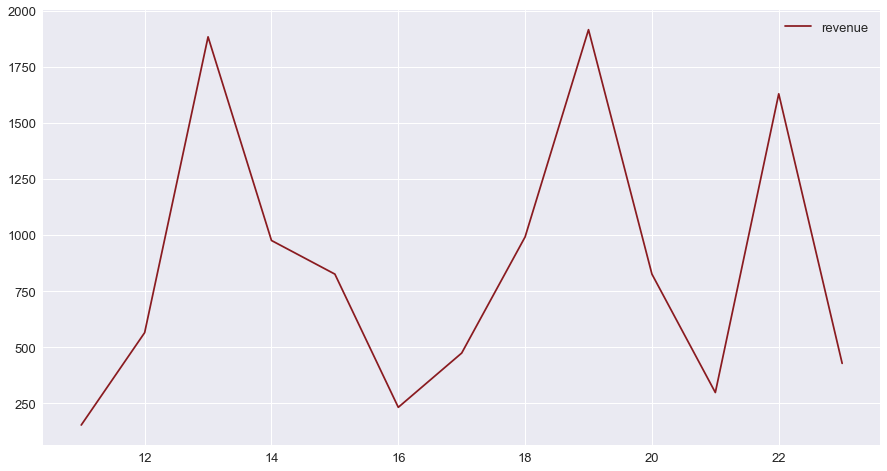

In [428]:
hourly_revenue['revenue'].plot(figsize = (15,8), fontsize = 13, color = '#8A1B20')
plt.legend(fontsize = 13)
plt.show()

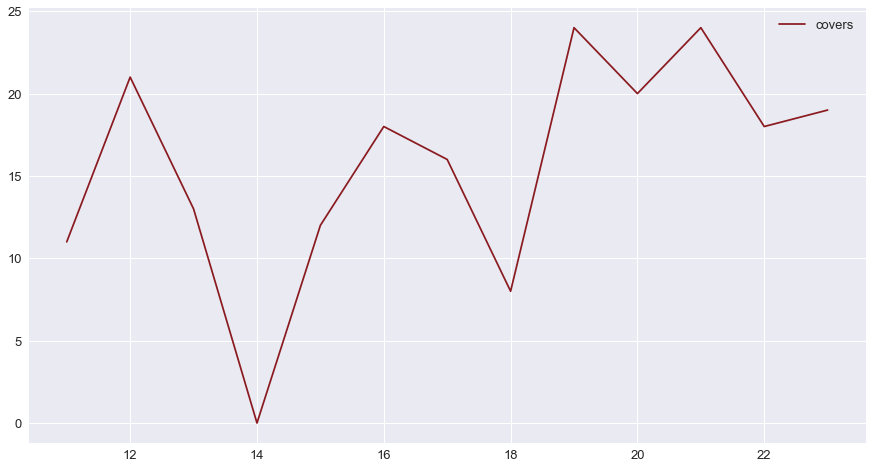

In [429]:
hourly_revenue['covers'].plot(figsize = (15,8), fontsize = 13, color = '#8A1B20')
plt.legend(fontsize = 13)
plt.show()

In [435]:
hourly_revenue.head()

,hour,revenue,covers,day
11,11 AM,153,11,Monday
12,12 PM,565,21,Monday
13,01 PM,1884,13,Monday
14,02 PM,976,0,Monday
15,03 PM,826,12,Monday


In [436]:
hourly_revenue.to_csv('../data/hourly_revenue.csv')